# <span style="color:green"><center> Estadística Bayesiana - Parcial \#1 </center></span>

### <span style="color:black"><center> jofmorenore </center></span>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
from scipy.special import gamma

In [2]:
alambre = pd.DataFrame(np.array([495 ,541 ,1461 ,1555 ,1603 ,2201 ,2750 ,3468 ,3516 ,4319 ,6622 ,7728 ,13159 ,21194]), columns=['tiempo'])
n = len(alambre['tiempo'])
s = sum(alambre['tiempo'])
print([n,s,s/n])

[14, 70612, 5043.714285714285]


## Punto 4: gráfico distribuciones previa y posterior

In [3]:
# previa
mu_0 = 4500
de_0 = 1800
a = (1800/4500)**(-2) + 2
b = 4500*(a-1)
print([a,b])

[8.25, 32625.0]


In [4]:
# posterior
ap = a + n
bp = b +s
[ap,bp]

[22.25, 103237.0]

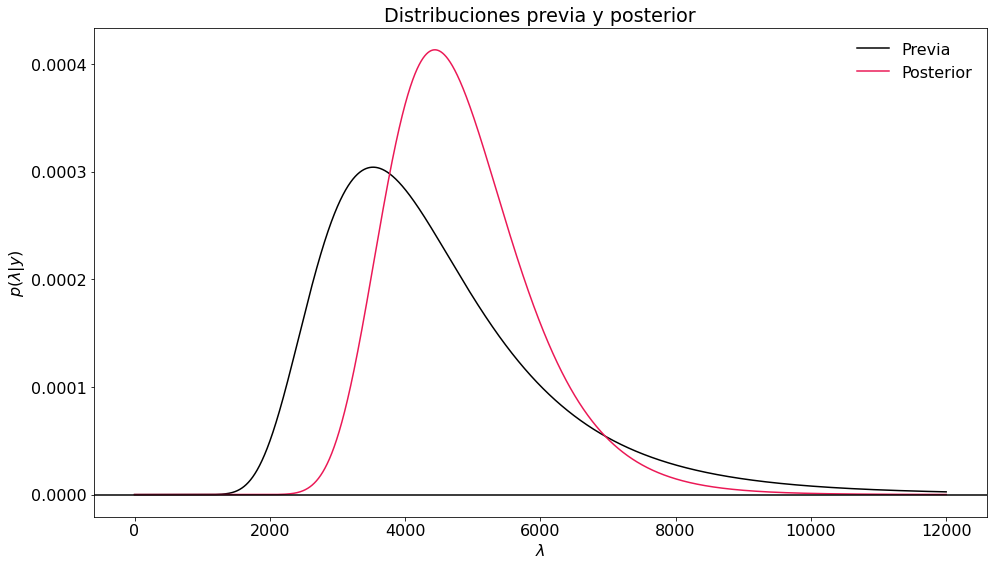

In [5]:
# grafico
plt.rc('font', size=16)
fig, ax = plt.subplots(figsize=(16, 9))

ld = np.linspace(start = 0, stop = 12000, num = 10**7)
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$p(\lambda|y)$')
ax.plot(ld,st.invgamma.pdf(x = ld,a = a, scale = b), color = '#000000', label = 'Previa')
ax.plot(ld,st.invgamma.pdf(x = ld,a = ap, scale = bp), color = '#EB1956', label = 'Posterior')
ax.axhline(y = 0, color = '#000000')
ax.set_title('Distribuciones previa y posterior')
ax.legend(loc = 0, frameon = False)

plt.savefig('pt4_previa_posterior.png')
plt.show()

## Punto 6: tabla inferencia Bayesiana y Frecuentista sobre $\lambda$

In [6]:
# Monte Carlo
np.random.seed(240922)
ld_mc = st.invgamma.rvs(a = ap, scale = bp, size = 100000)

In [7]:
# inferencia bayesiana
est_B = np.mean(ld_mc)
cv_B = np.std(ld_mc)/np.mean(ld_mc)
ic_B = np.quantile(ld_mc, q = [0.025,0.975])
# inferencia frecuentista (asintotica)
yb = np.mean(alambre['tiempo'])
sd = np.std(alambre['tiempo'])
est_F1 = yb
cv_F1 = np.sqrt(sd**2/n)/(yb)
ic_F1 = yb + np.array([-1,1])*st.norm.ppf(0.975)*np.sqrt(sd**2/n)
# inferencia frecuentista (boostrap)
np.random.seed(240922)
out = []
for i in range(100000):
    yy1 = np.random.choice(alambre['tiempo'], size = n)
    out.append(np.mean(yy1))
out = np.array(out)
est_F2 = np.mean(out)
cv_F2 = np.std(out)/np.mean(out)
ic_F2 = np.quantile(out,q = [0.025,0.975])

In [8]:
# resultados
tab = pd.DataFrame(data = [[est_B, cv_B*100, ic_B.round(2)],
                           [est_F1, cv_F1*100, ic_F1.round(2)],
                           [est_F2, cv_F2*100, ic_F2.round(2)]],
                   columns = ["Estimación", "CV (%)", "Intervalo al 95%"],
                   index = ["Bayesiano", "Frec. Asintótico", "Frec. Boostrap"])

round(tab,2)
#tab.round(2).to_latex()

,Estimación,CV (%),Intervalo al 95%
Bayesiano,4854.50,22.17,"[3180.78, 7375.24]"
Frec. Asintótico,5043.71,29.46,"[2130.96, 7956.47]"
Frec. Boostrap,5043.79,29.47,"[2534.0, 8301.72]"


## Punto 7: cálculo de probabilidades

+ Pr($\lambda < 4000 \mid \boldsymbol{y}$)

In [9]:
st.invgamma.cdf(4000, a=ap, scale=bp)

0.21547881999865395

+ Pr($y^* < 4000 \mid \boldsymbol{y}$)

In [10]:
np.random.seed(240922)
y1_mc = st.expon.rvs(scale = ld_mc, size = 100000)
np.mean(y1_mc < 4000)

0.56031

## Punto 8: prueba de hipótesis

$$
	B_{10} = \frac{1}{B_{01}} = \frac{ \left(\frac{\beta_0}{\beta_0 + s}\right)^{\alpha_0} \frac{\Gamma(\alpha_0 + n)}{\Gamma(\alpha_0)(\beta_0 + s)^{ + n}}}{\frac{1}{2} \lambda_0^{-n}\exp{\left(-\tfrac{s}{\lambda_0}  \right)}}
	$$

In [11]:
ld_0 = 4000
p_y_H0 = 0.5*ld_0**(-n)*np.exp(-s/ld_0)
p_y_H1 = (b/(b+s))**(a) * gamma(a+n)/(gamma(a)*(b+s)**(n))
# factor de Bayes B_01
p_y_H1/p_y_H0

1.5647819195059844

## Punto 9: pruebas de hipótesis dos poblaciones

In [12]:
alambre2 = pd.DataFrame(np.array([294, 569 , 766 , 1576 , 1602 , 2015 , 2166 , 3885 , 8141 , 10285]), columns = ['tiempo'])
n2 = len(alambre2['tiempo'])
s2 = sum(alambre2['tiempo'])
print([n2,s2,s2/n2])

[10, 31299, 3129.9]


$$
B_{10} = \frac{1}{B_{01}} = \frac{\frac{\Gamma(\alpha + n_1 + n_2)}{(\beta + s_1 + s_2)^{\alpha + n_1 + n_2}}}{\frac{\beta^{\alpha}}{\Gamma(\alpha)} \frac{\Gamma(\alpha + n_2)}{(\beta + s_2)^{\alpha + n_2}} \frac{\Gamma(\alpha + n_1 )}{(\beta + s_1 )^{\alpha + n_1 }} }
$$

In [13]:
p_y1_y2_H0 = gamma(a+n+n2)/(b+s+s2)**(a+n+n2)
p_y1_y2_H1 = (b**a)/(gamma(a)) * gamma(a+n2)/((b+s2)**(a+n2)) * gamma(a+n)/((b+s)**(a+n))
# factor de Bayes B_01
p_y1_y2_H1/p_y1_y2_H0

1.180971139871951

## Punto 10: bondad de ajuste

In [14]:
# distribucion predictiva posterior
B = 100000
ap2 = a + n2
bp2 = b + s2
np.random.seed(250922)
ld2_mc = st.invgamma.rvs(a = ap2, scale = bp2, size = 100000)

In [15]:
np.random.seed(250922)
y1_mc = st.expon.rvs(scale = ld_mc, size = B)
y2_mc = st.expon.rvs(scale = ld2_mc, size = B)

In [16]:
tab = [[(b+s)/(a+n-1), (b+s2)/(a+n2-1)], [np.mean(y1_mc), np.mean(y2_mc)]]
tab = pd.DataFrame(data = tab, columns = ["Tipo 1", "Tipo 2"], index = ["Exacta", "Aproximada"])
round(tab, 2)

,Tipo 1,Tipo 2
Exacta,4858.21,3705.74
Aproximada,4856.66,3701.00


In [17]:
# probabilidad posterior de que y*_1 > y*_2
round(np.mean(y1_mc > y2_mc), 3)

0.565

In [18]:
# estadistico observado
t1_obs, t2_obs = s/n , s2/n2
np.array([t1_obs,t2_obs]).round(1)

array([5043.7, 3129.9])

In [19]:
# distribucion predictiva posterior
t1_mc = []
t2_mc = []
np.random.seed(250922)
for i in range(B):
    # datos
    y1_rep = st.expon.rvs(ld_mc[i], size = n)
    y2_rep = st.expon.rvs(ld2_mc[i], size = n2)
    # estadistico
    t1_mc.append(np.mean(y1_rep))
    t2_mc.append(np.mean(y2_rep))

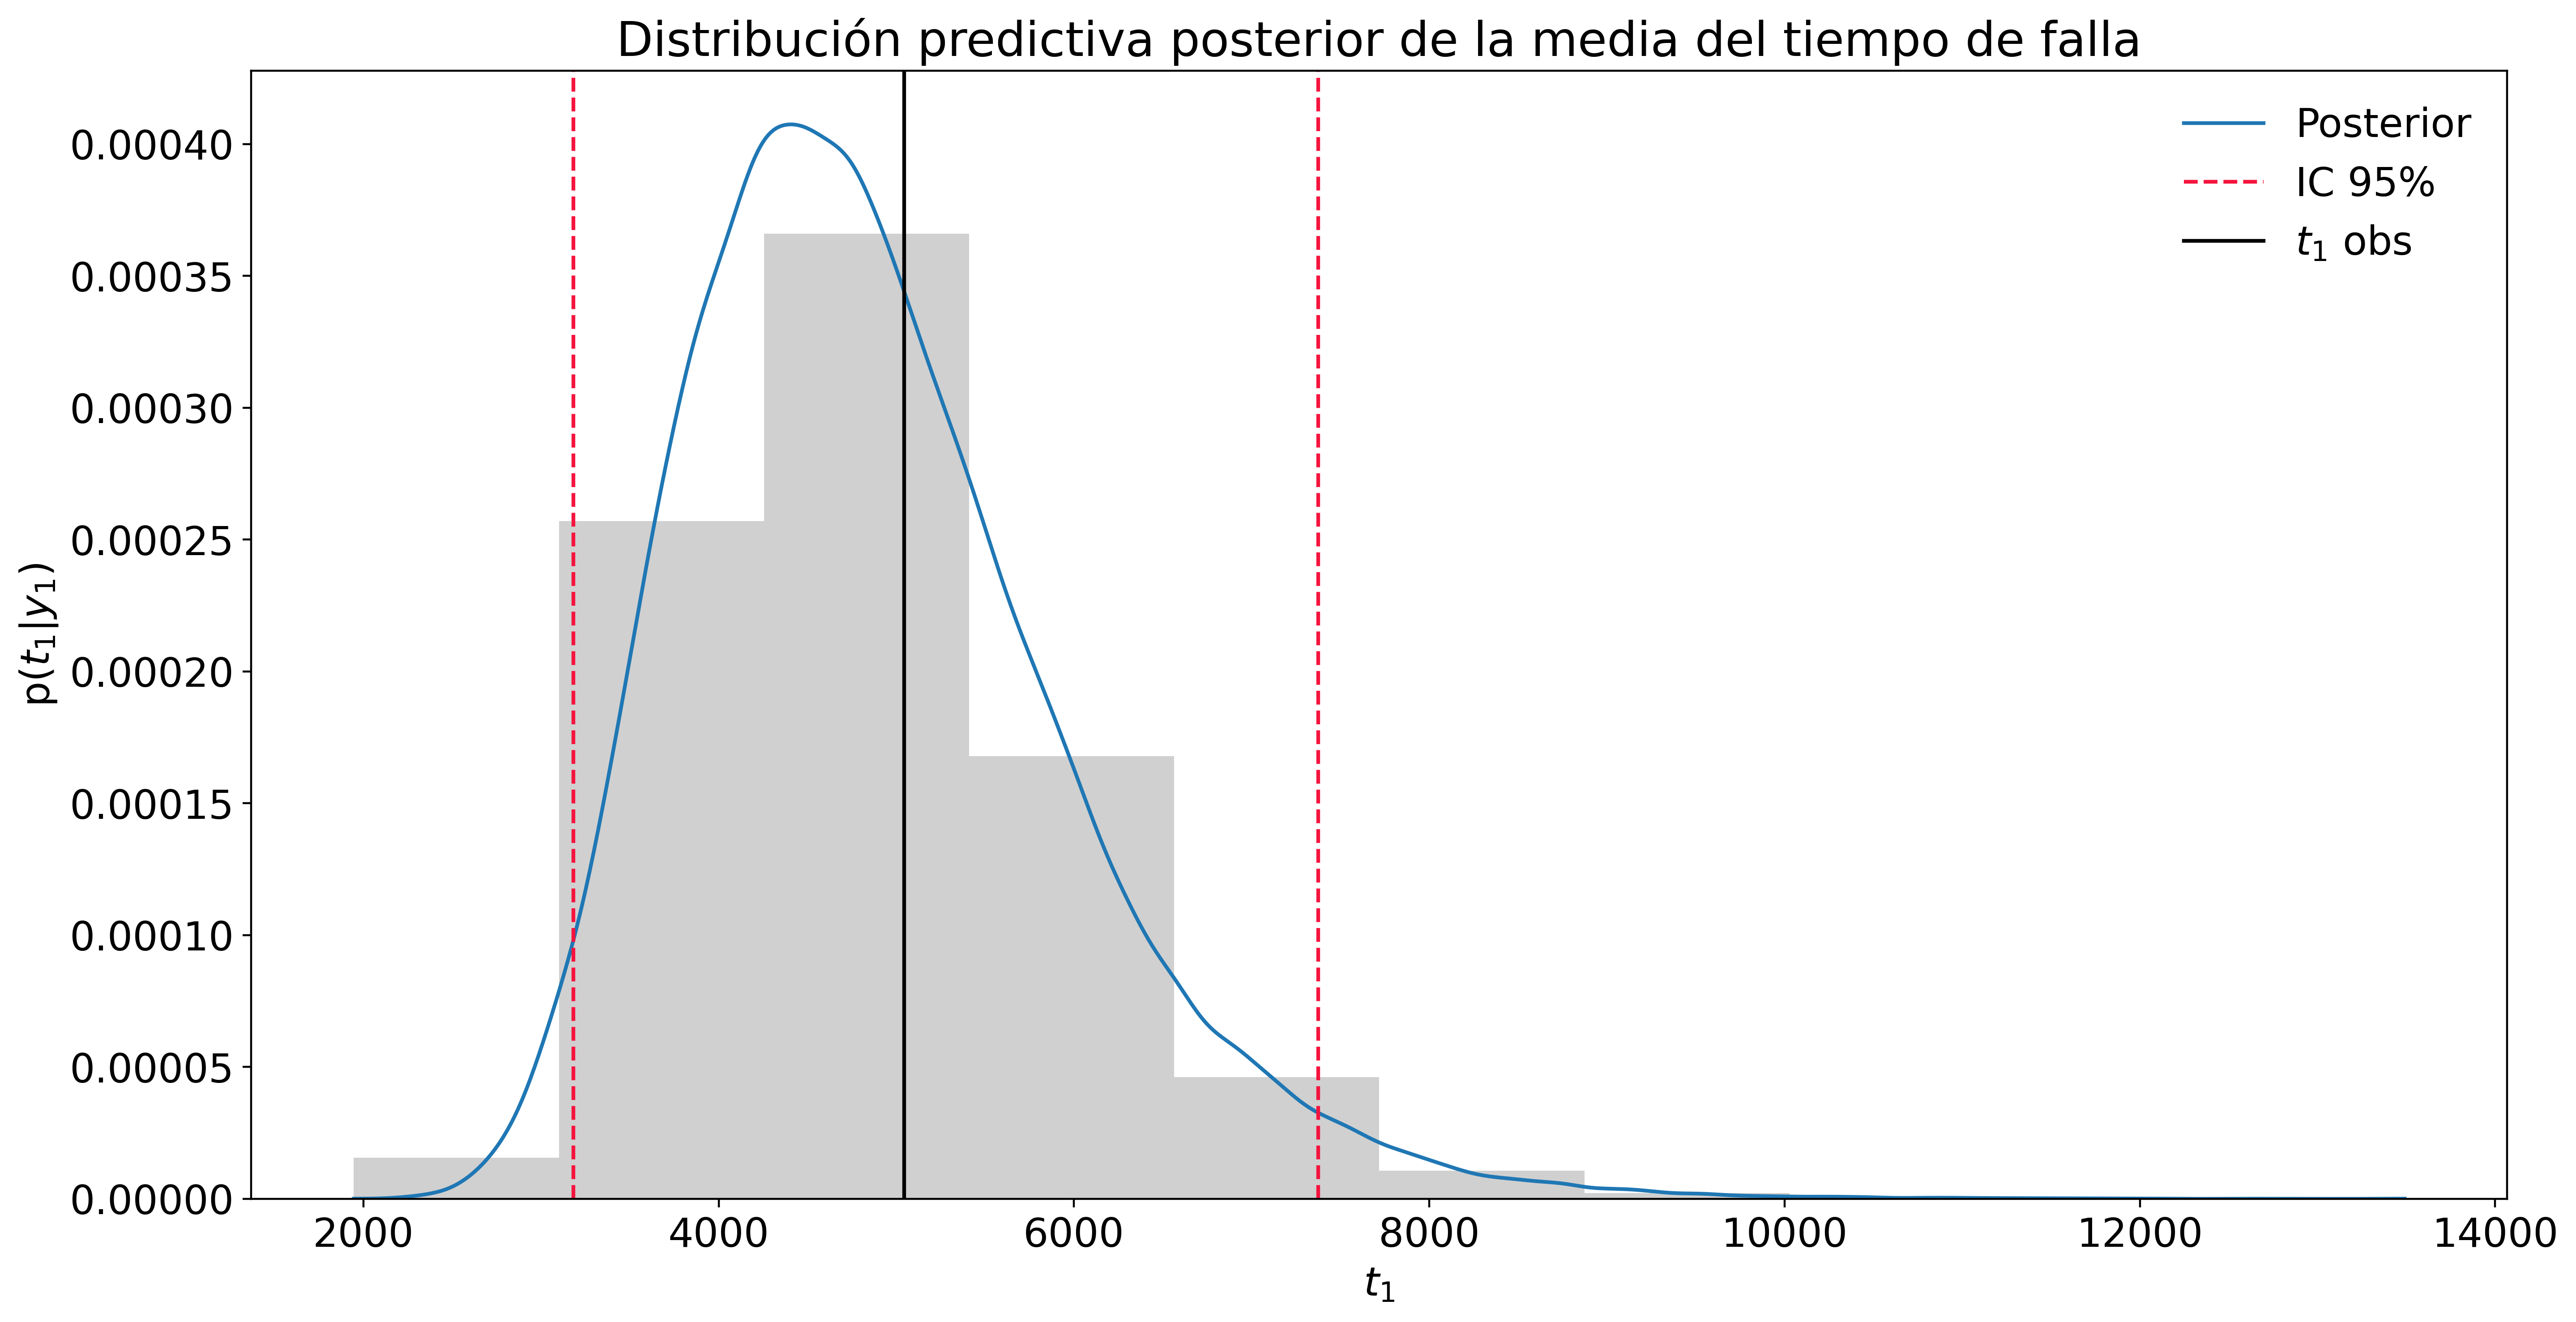

In [20]:
# gráfico alambre tipo 1
f = plt.figure(figsize = (14,7), dpi = 400)
axes = f.add_axes([0.1,0.1,0.9,0.9])

axes.set_xlabel('$t_1$')
axes.set_ylabel('p($t_1|y_1$)')
#
axes.hist(t1_mc,color = '#d0d0d0', density = True)
#
t1_grid = np.linspace(np.min(t1_mc), np.max(t1_mc), num = 1000)
axes.plot(t1_grid, st.gaussian_kde(t1_mc)(t1_grid), label = 'Posterior')
#
axes.axvline(x = np.quantile(t1_mc, q = [0.025]), color = '#F4143D', label = 'IC 95%', ls = '--')
axes.axvline(x = np.quantile(t1_mc, q = [0.975]), color = '#F4143D', ls = '--')
axes.axvline(x = t1_obs, color = 'black', label = '$t_1$ obs')
axes.set_title('Distribución predictiva posterior de la media del tiempo de falla')
#
plt.legend(loc = 0,frameon=False)

plt.savefig('pt10_tipo1.png')
plt.show()

In [21]:
# ppp (valor p predictivo posterior)
np.mean(np.array(t1_mc) > t1_obs)

0.37595

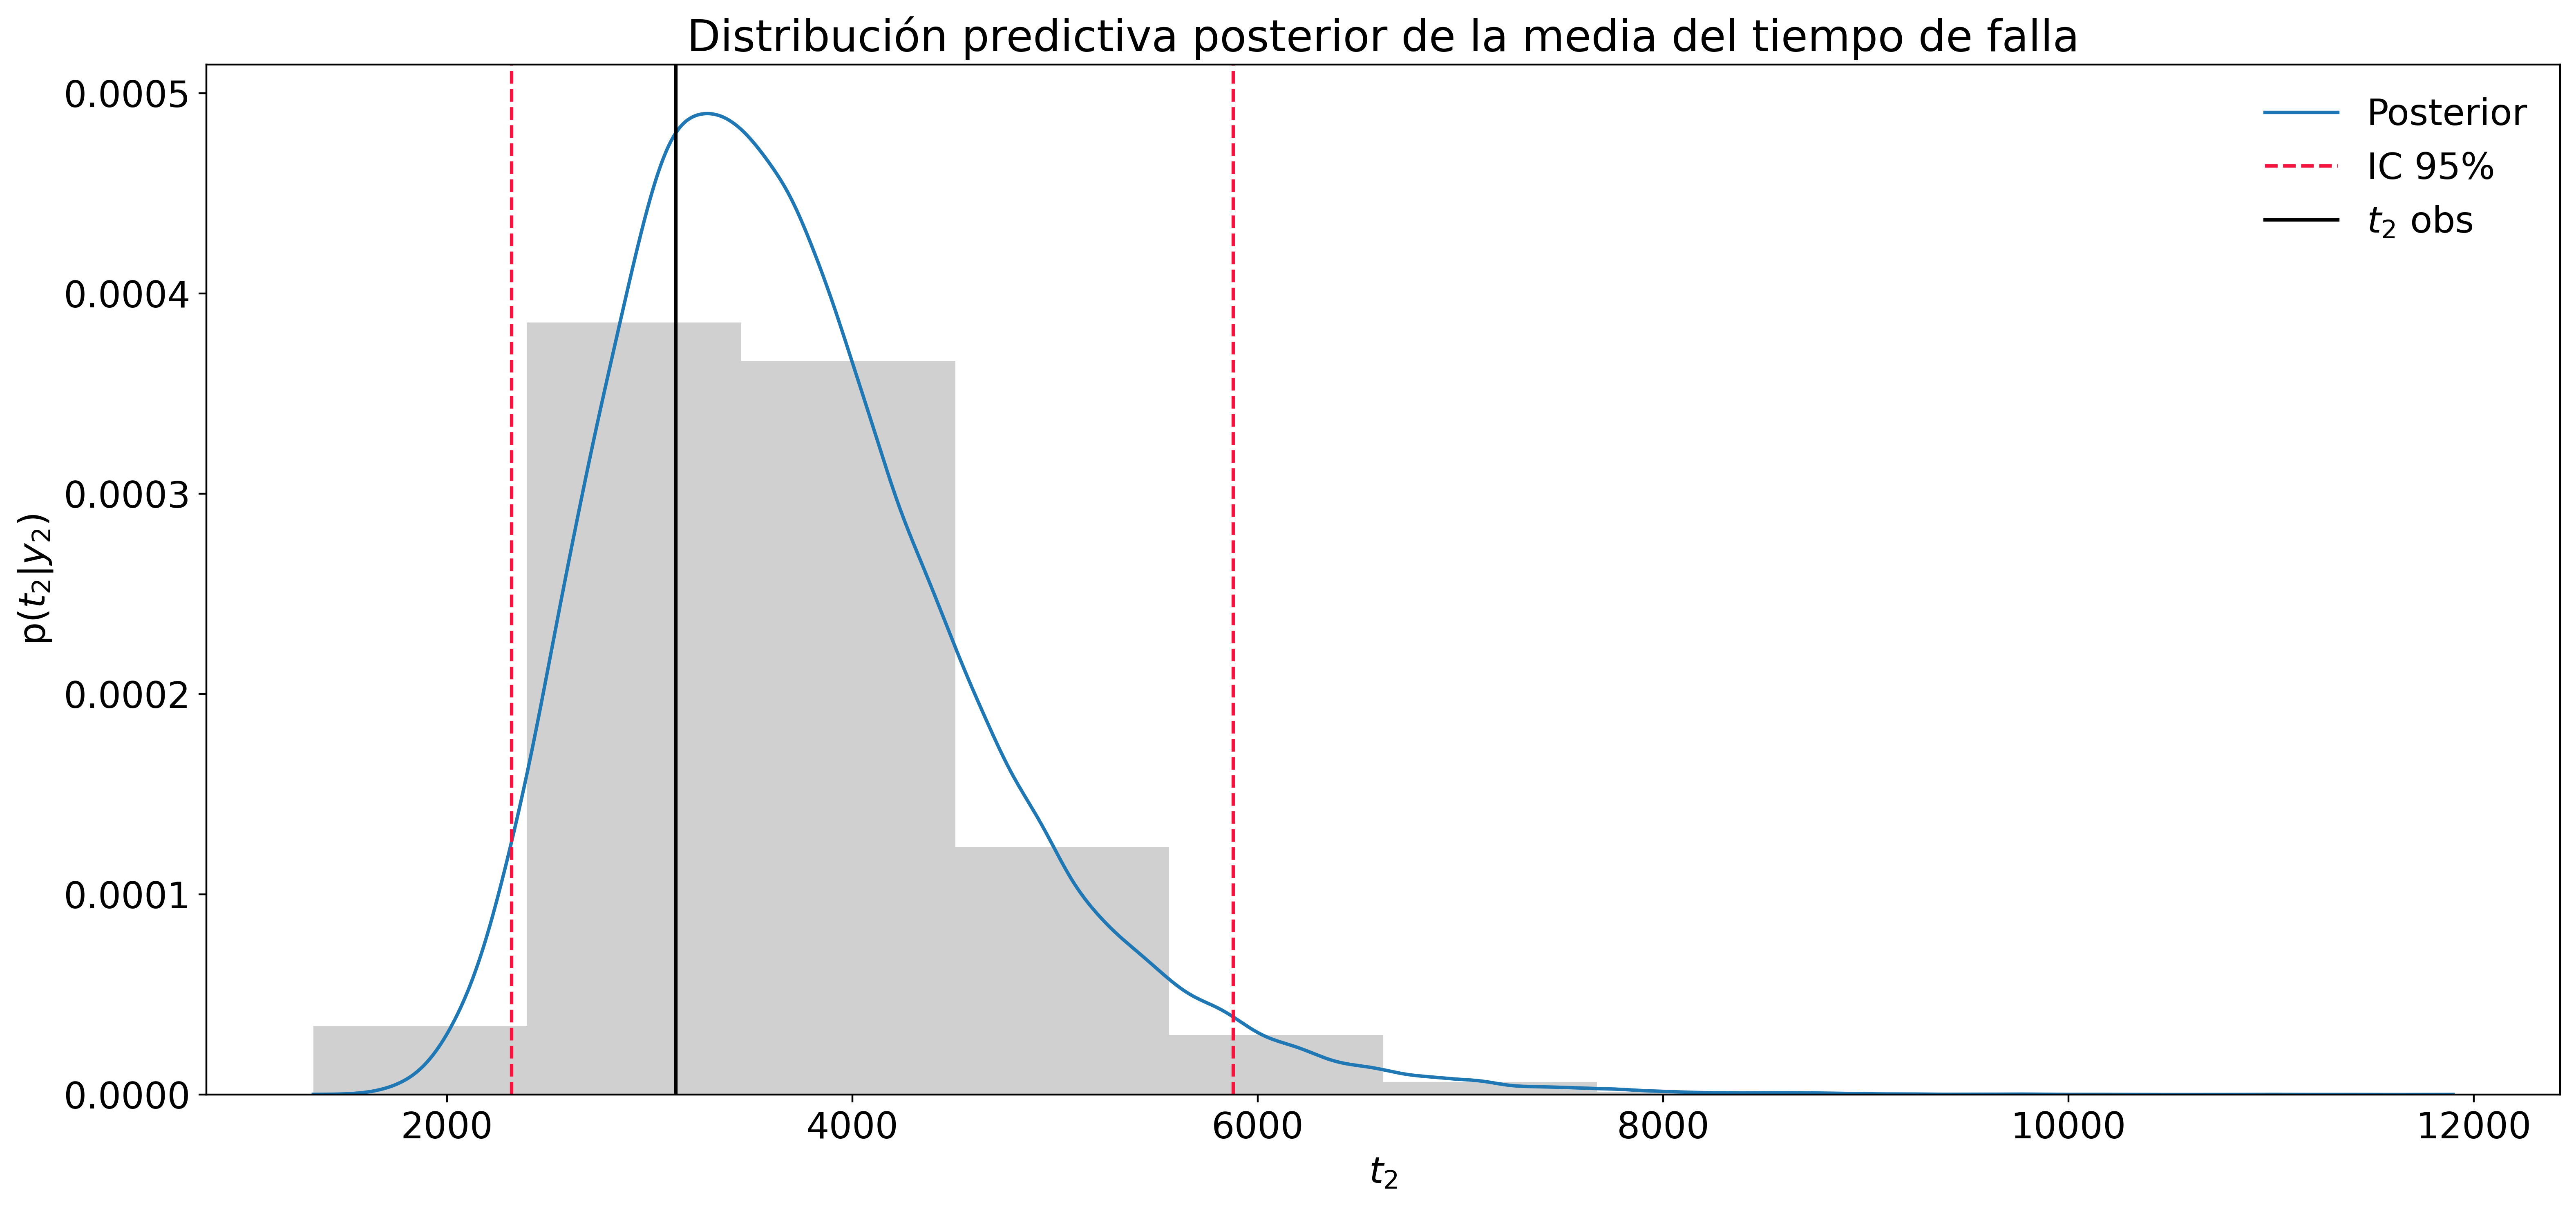

In [22]:
# gráfico alambre tipo 2
f = plt.figure(figsize = (16,7), dpi = 400)
axes = f.add_axes([0.1,0.1,0.9,0.9])

axes.set_xlabel('$t_2$')
axes.set_ylabel('p($t_2|y_2$)')
#
axes.hist(t2_mc,color = '#d0d0d0', density = True)
#
t2_grid = np.linspace(np.min(t2_mc), np.max(t2_mc), num = 1000)
axes.plot(t2_grid, st.gaussian_kde(t2_mc)(t2_grid), label = 'Posterior')
#
axes.axvline(x = np.quantile(t2_mc, q = [0.025]), color = '#F4143D', label = 'IC 95%', ls = '--')
axes.axvline(x = np.quantile(t2_mc, q = [0.975]), color = '#F4143D', ls = '--')
axes.axvline(x = t2_obs, color = 'black', label = '$t_2$ obs')
axes.set_title('Distribución predictiva posterior de la media del tiempo de falla')
#
plt.legend(loc = 0,frameon=False)

plt.savefig('pt10_tipo2.png')
plt.show()

In [23]:
# ppp (valor p predictivo posterior)
np.mean(np.array(t2_mc) > t2_obs)

0.71479